In [1]:
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append(os.path.join(os.path.dirname(""),".."))

import numpy
import custom
import torch
import torch.nn as nn
import pandas
import matplotlib.pyplot as plt

In [2]:
def make_word_pair(corpus, window_size = 1) :
    word_pair = []
    for s in corpus :
        for w in range(len(s)) :
            for i in range(1,window_size+1) :
                if s[w] == 0 :
                    continue
                if w-i >= 0 :
                    if s[w-i] == 0 :
                        continue
                    temp = [s[w], s[w-i]]
                    word_pair.append(temp)
                if w+i < len(s) :
                    if s[w+i] == 0 :
                        continue
                    temp = [s[w], s[w+i]]
                    word_pair.append(temp)
    
    return numpy.array(word_pair)

In [3]:
sentences = [
    'He is a king.',
    'She is a queen.',
    'He is a man.',
    'She is a woman.',
    'Warsaw is Poland capital.',
    'Berlin is Germany capital.',
    'Paris is France capital.',
    'Seoul is Korea capital.', 
    'Bejing is China capital.',
    'Tokyo is Japan capital.',
]

word_dict, number_dict = custom.make_dict(sentences)
corpus = custom.word_num_encoding(sentences, word_dict)
comatrix = custom.make_comatrix(corpus, len(word_dict), window_size=2)

print(word_dict)
print(corpus)

{'<pad>': 0, '<unk>': 1, 'he': 2, 'is': 3, 'a': 4, 'king': 5, 'she': 6, 'queen': 7, 'man': 8, 'woman': 9, 'warsaw': 10, 'poland': 11, 'capital': 12, 'berlin': 13, 'germany': 14, 'paris': 15, 'france': 16, 'seoul': 17, 'korea': 18, 'bejing': 19, 'china': 20, 'tokyo': 21, 'japan': 22}
[[ 2  3  4  5]
 [ 6  3  4  7]
 [ 2  3  4  8]
 [ 6  3  4  9]
 [10  3 11 12]
 [13  3 14 12]
 [15  3 16 12]
 [17  3 18 12]
 [19  3 20 12]
 [21  3 22 12]]


In [4]:
word_pair = make_word_pair(corpus, 2)

print(word_pair)

[[ 2  3]
 [ 2  4]
 [ 3  2]
 [ 3  4]
 [ 3  5]
 [ 4  3]
 [ 4  5]
 [ 4  2]
 [ 5  4]
 [ 5  3]
 [ 6  3]
 [ 6  4]
 [ 3  6]
 [ 3  4]
 [ 3  7]
 [ 4  3]
 [ 4  7]
 [ 4  6]
 [ 7  4]
 [ 7  3]
 [ 2  3]
 [ 2  4]
 [ 3  2]
 [ 3  4]
 [ 3  8]
 [ 4  3]
 [ 4  8]
 [ 4  2]
 [ 8  4]
 [ 8  3]
 [ 6  3]
 [ 6  4]
 [ 3  6]
 [ 3  4]
 [ 3  9]
 [ 4  3]
 [ 4  9]
 [ 4  6]
 [ 9  4]
 [ 9  3]
 [10  3]
 [10 11]
 [ 3 10]
 [ 3 11]
 [ 3 12]
 [11  3]
 [11 12]
 [11 10]
 [12 11]
 [12  3]
 [13  3]
 [13 14]
 [ 3 13]
 [ 3 14]
 [ 3 12]
 [14  3]
 [14 12]
 [14 13]
 [12 14]
 [12  3]
 [15  3]
 [15 16]
 [ 3 15]
 [ 3 16]
 [ 3 12]
 [16  3]
 [16 12]
 [16 15]
 [12 16]
 [12  3]
 [17  3]
 [17 18]
 [ 3 17]
 [ 3 18]
 [ 3 12]
 [18  3]
 [18 12]
 [18 17]
 [12 18]
 [12  3]
 [19  3]
 [19 20]
 [ 3 19]
 [ 3 20]
 [ 3 12]
 [20  3]
 [20 12]
 [20 19]
 [12 20]
 [12  3]
 [21  3]
 [21 22]
 [ 3 21]
 [ 3 22]
 [ 3 12]
 [22  3]
 [22 12]
 [22 21]
 [12 22]
 [12  3]]


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

tensor_x = torch.tensor(word_pair[:,0], dtype = torch.long, device = device)
tensor_t = torch.tensor(word_pair[:,1], dtype = torch.long, device = device)


In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class NN(nn.Module) :
    def __init__(self, word_size) :
        super().__init__();
        self.f = nn.Embedding(word_size, 2, max_norm=1, padding_idx=0)
        self.g = nn.Linear(2, word_size)
    def forward(self, x) :
        y = self.f(x)
        y = self.g(y)
        return y

F = NN(len(word_dict))
F = F.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(F.parameters())
epoch = 3000

for e in range(epoch) :
    tensor_y = F(tensor_x)

    loss = loss_function(tensor_y, tensor_t)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (e+1) % 100 == 0 :
        print("epoch {} | loss {}".format(e+1, loss))

epoch 100 | loss 3.02629017829895
epoch 200 | loss 2.8897364139556885
epoch 300 | loss 2.7656383514404297
epoch 400 | loss 2.6549577713012695
epoch 500 | loss 2.5603761672973633
epoch 600 | loss 2.4832117557525635
epoch 700 | loss 2.42207407951355
epoch 800 | loss 2.3787877559661865
epoch 900 | loss 2.3470664024353027
epoch 1000 | loss 2.321514844894409
epoch 1100 | loss 2.300161838531494
epoch 1200 | loss 2.28167724609375
epoch 1300 | loss 2.2653348445892334
epoch 1400 | loss 2.250628709793091
epoch 1500 | loss 2.2371716499328613
epoch 1600 | loss 2.2246322631835938
epoch 1700 | loss 2.2127914428710938
epoch 1800 | loss 2.2015433311462402
epoch 1900 | loss 2.1908152103424072
epoch 2000 | loss 2.1805248260498047
epoch 2100 | loss 2.170557975769043
epoch 2200 | loss 2.1607847213745117
epoch 2300 | loss 2.1511032581329346
epoch 2400 | loss 2.1414780616760254
epoch 2500 | loss 2.1319642066955566
epoch 2600 | loss 2.122683525085449
epoch 2700 | loss 2.113788366317749
epoch 2800 | loss 2.10

In [7]:
F = F.to("cpu")
vector_df = pandas.DataFrame(F.state_dict()['f.weight'].numpy(), columns = ['a','b'])
vector_df['word'] = list(word_dict.keys())

print(vector_df)

           a         b     word
0   0.000000  0.000000    <pad>
1   0.180659 -1.067507    <unk>
2  -0.833811  0.554120       he
3   0.330545 -0.270947       is
4   1.000639 -0.005479        a
5  -0.835221  0.551991     king
6  -0.845236  0.536650      she
7  -0.846296  0.535019    queen
8  -0.835437  0.551685      man
9  -0.827401  0.563569    woman
10  0.687819  0.727552   warsaw
11  0.089852 -0.199819   poland
12  0.606763  0.796112  capital
13  0.736280  0.678434   berlin
14  0.010678 -0.081743  germany
15 -0.110018  0.994921    paris
16  0.108579 -0.084151   france
17  0.742761  0.670906    seoul
18  0.268793 -0.260781    korea
19  0.062753  0.998581   bejing
20 -0.164616 -0.225389    china
21  0.685774  0.729333    tokyo
22 -0.315365 -0.285217    japan


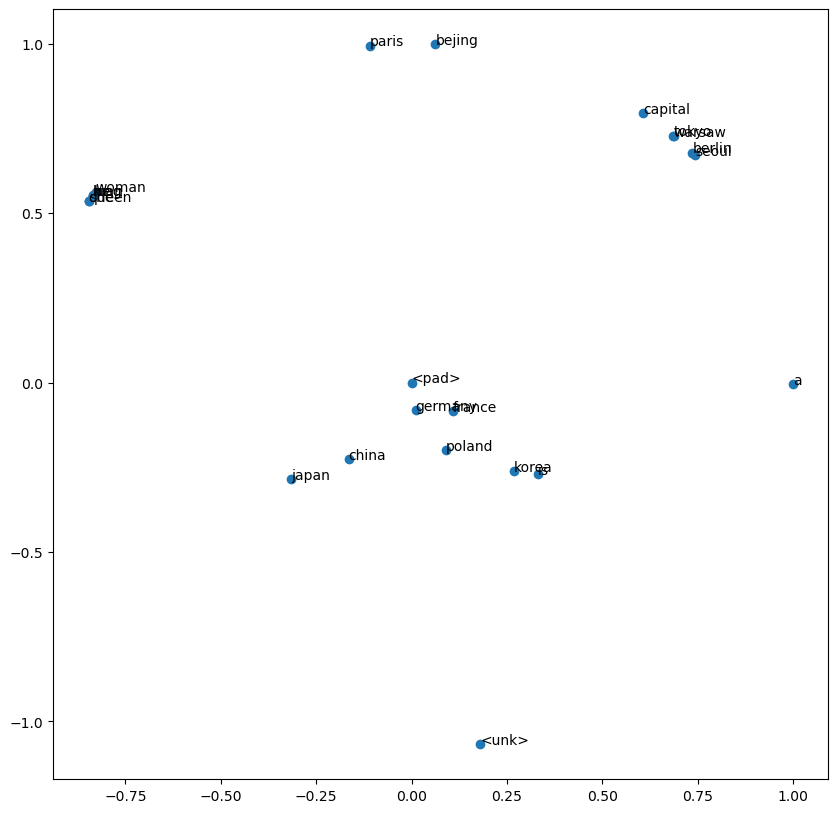

In [8]:
ano = vector_df['word'].values.tolist()
a = vector_df['a'].values.tolist()
b = vector_df['b'].values.tolist()

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(a,b)

for i in range(len(ano)) :
    ax.annotate(ano[i], (a[i], b[i]))

plt.show()

In [9]:
test = nn.Linear(5,2)
a = torch.randn(1,5)

print(test(a))
print(numpy.dot(a.numpy(), test.state_dict()['weight'].T.numpy()) + test.state_dict()['bias'].numpy())

tensor([[ 0.1512, -0.1211]], grad_fn=<AddmmBackward0>)
[[ 0.15115696 -0.12114621]]
